<h4 style ='colour:blue'>Decision tree model will be used to predict if a passenger in the ill-fated Titanic ship will survive or not based on:
      
    
    
    
**-Pclass**
    
    
**-Sex**
    
**-Age**
    
**-Fare**

<h4 style='color:blue'>Importing all the necessary libraries

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4 style='color:blue'>Importing the dataset

In [2]:
titanic= pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h4 style='color:blue'>Data Cleaning

In [4]:
#Checking for duplicates
titanic.duplicated().sum()

0

In [5]:
#Checking for null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 null values in the Age column and removing them could skew my data. 

Hence, I will replace them with median values

Repalcing null values in the Age column with median of all ages in dataset

In [6]:
#replacing all the null values in the Age column with the median of the values in that column
titanic['Age']=titanic['Age'].fillna (titanic['Age'].median())
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [7]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
#Checking to confirm that there are no null values in the Age column
titanic.Age.isnull().sum()

0

**The cabin and embarked columns are inconsequential because it will not be used for my predictions.**

**Thus, I will leave the null values unchanged in both columns**

<h4 style='color:blue'>Dropping the Column named 'Survived'

In [9]:
#dropping the salary column which is the dependent variable and assigning the other columns to a variable name
titanic1=titanic.drop('Survived', axis= 'columns')
titanic1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
#assigning the salary column to a variable name
titanic2=titanic['Survived']
titanic2

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
#Importing label encoder and assigning variable names the the LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_Pclass= LabelEncoder()
label_age= LabelEncoder()
label_sex= LabelEncoder()
label_fare= LabelEncoder()

In [13]:
#Renaming the columns
titanic1['Pclass_new']=label_Pclass.fit_transform(titanic1['Pclass'])
titanic1['Age_new']=label_age.fit_transform(titanic1['Age'])
titanic1['Sex_new']=label_sex.fit_transform(titanic1['Sex'])
titanic1['fare_new']=label_fare.fit_transform(titanic1['Fare'])

In [14]:
titanic1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_new,Age_new,Sex_new,fare_new
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,28,1,18
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,51,0,207
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,34,0,41
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,47,0,189
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,47,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,35,1,85
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,24,0,153
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,2,36,0,131
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,34,1,153


In [15]:
#Dropping columns that are not needed
titanic1=titanic1.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin' ,'Embarked'], axis='columns')
titanic1

,Pclass_new,Age_new,Sex_new,fare_new
0,2,28,1,18
1,0,51,0,207
2,2,34,0,41
3,0,47,0,189
4,2,47,1,43
...,...,...,...,...
886,1,35,1,85
887,0,24,0,153
888,2,36,0,131
889,0,34,1,153


In [16]:
#importing our model
from sklearn import tree
from sklearn.model_selection import train_test_split
model=tree.DecisionTreeClassifier()

In [18]:
X_train, X_test, y_train, y_test= train_test_split(titanic1, titanic2, test_size=0.2)

In [19]:
#fitting our model
model.fit(titanic1, titanic2)

DecisionTreeClassifier()

<h4 style='color:blue'>Predicting if a passengers in any of the PClass will Survive

In [25]:
model.predict(X_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

**Each output in the array returned tallies with the index number of each passenger on board. O connotes the passenger did not survive while 1 connotes the passengers survived**

<h4 style='color:blue'>Accuracy Score of the model

In [20]:
model.score(X_test, y_test)

0.9776536312849162

<h4 style='color:blue'>Confusion Matrix

In [32]:
y_predicted=model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[118,   0],
       [  4,  57]], dtype=int64)

Text(69.0, 0.5, 'Truth')

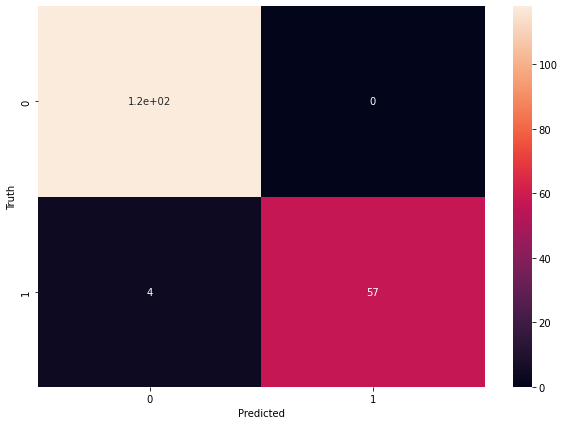

In [36]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**A total of 179 (118+0+4+57=179) random predictions were done which tallies with our test score of 20% since 
the total number of passengers on board was 892 (i.e 20% of 892 is approximately 179)**

**It was predicted that 120 passengers who were randomly selected will not survive the shipwreck and the prediction was true**

**No random passenger was selected to check if they will survive shipwreck and they did not**

**It was predicted that some 4 random passengers will not survive but they did**

**Also, it was predicted that some 57 random passengers will survive and they did**

